In [54]:
import numpy as np
from matplotlib import pyplot as plt
ierror = 0
vprev = 0
ref = 3000
def PID(v, SP, params, delta_t):
    global ierror
    global vprev
    error = SP - v
    
    #print("sp",SP)
    #print("v",v)
    print('error',error)
    ierror = ierror + error*delta_t
    derror = (v - vprev)/delta_t

    #kp,ki,kd = get_parameters()
    kp=params["kp"]
    ki=params["ki"]
    kd=params["kd"]
    
    u = kp*error + ki*ierror - kd*derror

    if u>=ref:
        u = ref
        ierror = ierror - error*delta_t
    elif u<=-ref:
        u = ref
        ierror = ierror - error*delta_t
    vprev = v
    return u
   





In [59]:
def run():
    T_SIZE = 100
    SET_POINT = 1000

    t = np.linspace(0, 500, num=T_SIZE)
    SP = np.ones(T_SIZE)*SET_POINT
    #SP[0: 5] = 0
    #SP[5: 25] = 500
    #SP[26: 50] = 1500
    #SP[51:75 ] = 1750
    #SP[76:99 ] = 2000

    pid_1 = PIDController(dt=t[1]-t[0], initial_error=0, set_point=SP[0])
    u = np.zeros(len(t))
    v = np.zeros((len(t),1))
    delta_t=t[1] - t[0]
    a = np.arange(1, 1000)
    params = {'kp':0.01,'ki':0.1,'kd':0}
    for i in range(len(t)-1):
         u[i+1] = PID(v[i],SP[i],params, delta_t)
         print(u[i+1])
         print("v",v[-1])
         #y = load from excel - actual speed
         y = a[i+100]
         print(a[i])
         v[i+1] = y
    plt.plot(t,v,'b--',label='Transfer Fcn')
    #plt.plot(t[0:100],out1[0:100],'b--',label='Transfer Fcn')
    #plt.plot(t,SP,'r--',label='Transfer Fcn')
    #plt.plot(t,out2,'r--',label='Transfer Fcn')
    plt.plot(t,u,'y--',label='Transfer Fcn')
    plt.xlabel('Time')
    plt.ylabel('Response (y)')
    plt.show()

error [1000.]
3000.0
v [0.]
1
error [899.]
2988.282929292929
v [0.]
2
error [898.]
3000.0
v [0.]
3
error [897.]
3000.0
v [0.]
4
error [896.]
3000.0
v [0.]
5
error [895.]
3000.0
v [0.]
6
error [894.]
3000.0
v [0.]
7
error [893.]
3000.0
v [0.]
8
error [892.]
3000.0
v [0.]
9
error [891.]
3000.0
v [0.]
10
error [890.]
3000.0
v [0.]
11
error [889.]
3000.0
v [0.]
12
error [888.]
3000.0
v [0.]
13
error [887.]
3000.0
v [0.]
14
error [886.]
3000.0
v [0.]
15
error [885.]
3000.0
v [0.]
16
error [884.]
3000.0
v [0.]
17
error [883.]
3000.0
v [0.]
18
error [882.]
3000.0
v [0.]
19
error [881.]
3000.0
v [0.]
20
error [880.]
3000.0
v [0.]
21
error [879.]
3000.0
v [0.]
22
error [878.]
3000.0
v [0.]
23
error [877.]
3000.0
v [0.]
24
error [876.]
3000.0
v [0.]
25
error [875.]
3000.0
v [0.]
26
error [874.]
3000.0
v [0.]
27
error [873.]
3000.0
v [0.]
28
error [872.]
3000.0
v [0.]
29
error [871.]
3000.0
v [0.]
30
error [870.]
3000.0
v [0.]
31
error [869.]
3000.0
v [0.]
32
error [868.]
3000.0
v [0.]
33
error [

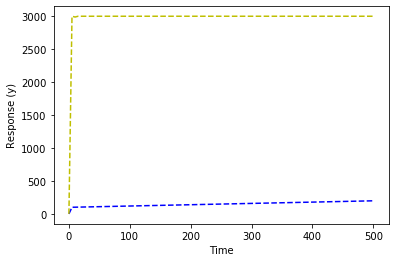

In [60]:
if __name__ == "__main__":
    run()